In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import matplotlib
import cartopy.crs as ccrs # Projections
import cartopy.feature as cfeature
import cartopy

In [4]:
sentinel_data_A = pd.read_csv("./Sentinel_3A_water_level_Version0.csv")

In [19]:
sentinel_data_A = sentinel_data_A.rename(
    columns={
        "Date (YYYYMMDD)" : "date",
        "Lake_name" : "lake_name",
        "Latitude" : "latitude",
        "Longitude" : "longitude",
        "Relaive_orbit" : "relative_orbit",
        "Lake water level (m)" : "lake_water_level"
    }
)

In [74]:
# Isolate Lake Winnipeg data
lake_winnipeg = sentinel_data_A[
    sentinel_data_A["lake_name"] == "Winnipeg"
]
lake_winnipeg.head(25)

,date,lake_name,latitude,longitude,relative_orbit,lake_water_level
228868,20160401,Winnipeg,51.860057,-96.819518,283,217.4011
228869,20160401,Winnipeg,51.857120,-96.820913,283,217.5197
228870,20160401,Winnipeg,51.854183,-96.822309,283,217.2064
228871,20160401,Winnipeg,51.851245,-96.823704,283,217.3213
228872,20160401,Winnipeg,51.848308,-96.825099,283,217.3166
228873,20160401,Winnipeg,51.845371,-96.826494,283,217.3736
228874,20160401,Winnipeg,51.842434,-96.827889,283,217.2678
228875,20160401,Winnipeg,51.839496,-96.829283,283,217.3101
228876,20160401,Winnipeg,51.836559,-96.830678,283,217.3225
228877,20160401,Winnipeg,51.833622,-96.832072,283,217.2695


<AxesSubplot:>

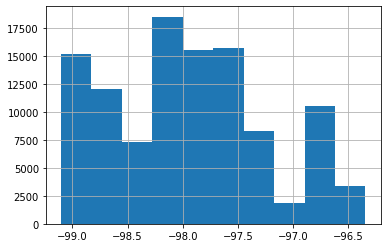

In [111]:
lake_winnipeg["longitude"].hist()

In [14]:
cmap = matplotlib.cm.get_cmap('viridis')
colours = cmap(np.linspace(0, 1, 10))
print(colours[0])

[0.267004 0.004874 0.329415 1.      ]


In [30]:
# # Plot the latitude/longitude
# fig = plt.figure()

# # One colour for each date
# cmap = matplotlib.cm.get_cmap('viridis')
# ground_track_colours = cmap(
#     np.linspace(
#         0,
#         1,
#         len(pd.unique(lake_winnipeg["date"]))
#     )
# )

# ax = fig.add_subplot(111)
# for j, date in enumerate(pd.unique(lake_winnipeg["date"])):
#     ax.scatter(
#         x=lake_winnipeg.loc[
#             lake_winnipeg["date"]==date,
#             "latitude"
#         ],
#         y=lake_winnipeg.loc[
#             lake_winnipeg["date"]==date,
#             "longitude"
#         ],
#         c=[ground_track_colours[j]]
#     )
# ax.set_xlabel("Latitude (deg)")
# ax.set_ylabel("Longitude (deg)")
# plt.show()

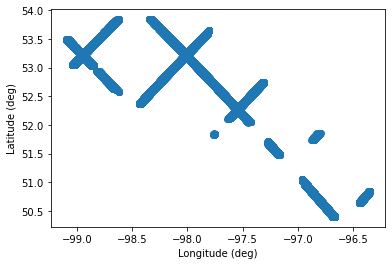

In [64]:
# Plot the latitude/longitude
fig = plt.figure()

ax = fig.add_subplot(111)

ax.scatter(
    x=lake_winnipeg["longitude"],
    y=lake_winnipeg["latitude"],
)
ax.set_xlabel("Longitude (deg)")
ax.set_ylabel("Latitude (deg)")
plt.show()

## Experiment with Cartopy

In [107]:
lake_winnipeg["longitude"]

228868   -96.819518
228869   -96.820913
228870   -96.822309
228871   -96.823704
228872   -96.825099
            ...    
337367   -96.431722
337368   -96.433018
337369   -96.434314
337370   -96.435610
337371   -96.436906
Name: longitude, Length: 108504, dtype: float64

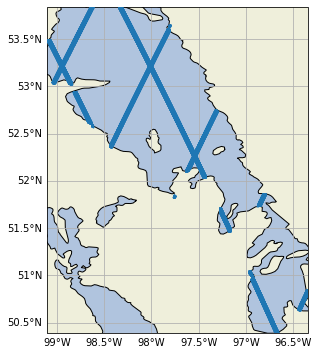

In [122]:
# Lake Winnipeg extent from GeoJSON
# https://geojson.io/#map=7/52.355/-99.888
# extent = [
#     -101.40380859375,
#    -95.877685546875,
#     49.774169585277406,
#     54.15600109028493
# ]

# Get the extent from the data
extent = [
    lake_winnipeg["longitude"].min(),
    lake_winnipeg["longitude"].max(),
    lake_winnipeg["latitude"].min(),
    lake_winnipeg["latitude"].max(),
]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

# High resolution lakes
lakes_50m = cfeature.NaturalEarthFeature('physical', 'lakes', '10m')

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.set_extent(extent)

# ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black')
# ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(lakes_50m, facecolor='lightsteelblue',edgecolor='black')

# Plot altimetry points
ax.scatter(
    x=np.array(lake_winnipeg["longitude"]),
    y=np.array(lake_winnipeg["latitude"]),
    zorder=10,
    s=1
)
# ax.plot(-97.1384, 52.8951, 'bo', markersize=7, transform=ccrs.Geodetic())

# Format gridlines
# https://scitools.org.uk/cartopy/docs/latest/gallery/gridlines_and_labels/gridliner.html
gl = ax.gridlines(draw_labels=True)
gl.top_labels = False
gl.right_labels = False
# ax.set_global()
plt.show()